# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [63]:
df = pd.read_csv('CHURN_TELECON_TRATADA.csv', sep=';')

df.head()

,IDcliente,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefone,Servico_Internet,Servico_seguranca,Suporte_Tecnico,Streaming_TV,Tipo_Contrato,Tipo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,1,0,1,0,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,DSL,Yes,Yes,No,One year,Bank transfer (automatic),71.45,1840.75,0
4,8191-XWSZG,Female,0,0,0,52,1,No,No internet service,No internet service,No internet service,One year,Mailed check,71.45,1022.95,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   IDcliente           2488 non-null   object 
 1   Genero              2488 non-null   object 
 2   Idoso               2488 non-null   int64  
 3   Casado              2488 non-null   int64  
 4   Dependentes         2488 non-null   int64  
 5   Tempo_como_Cliente  2488 non-null   int64  
 6   Servico_Telefone    2488 non-null   int64  
 7   Servico_Internet    2488 non-null   object 
 8   Servico_seguranca   2488 non-null   object 
 9   Suporte_Tecnico     2488 non-null   object 
 10  Streaming_TV        2488 non-null   object 
 11  Tipo_Contrato       2488 non-null   object 
 12  Tipo_Pagamento      2488 non-null   object 
 13  Pagamento_Mensal    2488 non-null   float64
 14  Total_Pago          2488 non-null   float64
 15  Churn               2488 non-null   int64  
dtypes: flo

# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [71]:
# excluindo as colunas categóricas e boolenas do describe
df.describe().drop(columns=['Churn', 'Idoso', 'Dependentes', 'Servico_Telefone','Casado']).round(2)

,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.00,2488.00,2488.00
mean,32.35,66.34,2290.09
std,24.64,28.05,2264.59
min,0.00,18.40,18.80
25%,8.00,45.40,402.34
50%,29.00,71.45,1402.90
75%,56.00,87.71,3867.16
max,72.00,118.65,8564.75


#### Respondendo as perguntas A e B: Ao usar o describe vemos que a distruibuição dos dados não é normal, mas a média e a mediana não estão muito distantes, com exceção da coluna "Total_Pago", neste caso podemos observar o desvio padrão bem alto e a diferença grande da média e mediana, este comportamento pode ser dado pela existência de outliers, porém mais análises precisam ser feitas para que esta hipótese se confirme

## Respondendo as perguntas C e D

### Analisando a coluna "Total_Pago"

In [72]:
# Observando se existem outliers em 'Total_Pago' e também a distribuição
# Boxplot
fig_box = px.box(df, x='Total_Pago', title='Boxplot de Total_Pago')
fig_box.show()

# Histograma
fig_hist = px.histogram(df, x='Total_Pago', nbins=50, title='Histograma de Total_Pago')
fig_hist.update_layout(bargap=0.1)
fig_hist.show()


O boxplot não indica a presença de outliers na variável Pagamento_Mensal, mas isso, por si só, não justifica o desvio padrão elevado. Ao observar a distribuição dos dados, percebe-se uma forte concentração nos valores mais baixos, o que já era esperado e sugere uma assimetria.

Esse comportamento pode ajudar a explicar a diferença entre média e mediana, mas para compreender melhor essa discrepância e a alta variabilidade nos pagamentos, pode ser necessário analisar outras variáveis que influenciam diretamente o valor total pago.

Neste caso, a variável "Tempo_como_Cliente" surge como uma suspeita relevante. É plausível que clientes mais antigos estejam associados a planos mais caros ou acumulem vantagens que elevam seus pagamentos, o que pode estar impactando a média e contribuindo para o alto desvio padrão.

### Analisando "Tempo_como_Cliente"

In [73]:
# Observando se existem outliers em 'Tempo_como_Cliente' e também a distribuição
# Boxplot
fig_box = px.box(df, x='Tempo_como_Cliente', title='Boxplot de Tempo_como_Cliente')
fig_box.show()

# Histograma
fig_hist = px.histogram(df, x='Tempo_como_Cliente', nbins=50, title='Histograma de Tempo_como_Cliente')
fig_hist.update_layout(bargap=0.1)
fig_hist.show()

Após a análise de outliers — que confirmou sua ausência — e a observação da distribuição dos dados, percebe-se uma concentração clara em dois grupos de clientes, uma distribuição bimodal:

* Clientes novos, com tempo de assinatura entre 0 e 6 meses

* Clientes antigos, com tempo de assinatura entre 68 e 73 meses

A maior parte dos clientes pertence ao primeiro grupo, ou seja, clientes recentes. Esse desequilíbrio entre os grupos ajuda a explicar a diferença significativa entre a mediana e a média do valor em "Total_Pago".

A mediana é consideravelmente mais baixa porque a maioria dos clientes ainda está nos primeiros meses de assinatura, e, portanto, pagaram valores menores até o momento. Já a média é mais elevada, pois é impactada pelos clientes mais antigos, que acumularam valores maiores ao longo do tempo. Mesmo em menor número, esses clientes de longa data elevam a média, fazendo com que ela fique acima da mediana. Entretanto, para ter total certeza uma analise bivariada se demonstra necessária

### Analisando Pagamento_Mensal

In [74]:
# Observando se existem outliers em 'Pagamento_Mensal' e também a distribuição
# Boxplot
fig_box = px.box(df, x='Pagamento_Mensal', title='Boxplot de Pagamento_Mensal')
fig_box.show()

# Histograma
fig_hist = px.histogram(df, x='Pagamento_Mensal', nbins=50, title='Histograma de Pagamento_Mensal')
fig_hist.update_layout(bargap=0.1)
fig_hist.show()

A ausência de outliers e a forma da distribuição da variável "Pagamento_Mensal" sugerem uma distribuição bimodal, com duas concentrações principais de valores: uma nos valores mais baixos e outra em torno de valores próximos à média. Esse padrão indica a presença de dois grupos distintos de clientes.

Uma possível explicação para esse comportamento é que clientes mais novos tendem a optar por planos mais baratos, buscando testar o serviço com um investimento inicial menor. Por outro lado, o segundo pico — com valores mais altos — pode estar relacionado a clientes de longa data ou mais engajados, que migraram para planos mais completos, mas ainda dentro de uma faixa de valor acessível.

Embora essa interpretação seja coerente com a distribuição observada, é necessário realizar uma análise bivariada — por exemplo, entre "Pagamento_Mensal" e "Tempo_como_Cliente" — para confirmar essa hipótese e entender melhor o perfil de cada grupo.

### Analisando a coluna "Tipo_contrato"

In [75]:
# Checando a distribuição em Tipo_Contrato
proporcao_tipo_contrato = df['Tipo_Contrato'].value_counts(normalize=True).reset_index()
proporcao_tipo_contrato.columns = ['Tipo_Contrato', 'Porcentagem']
proporcao_tipo_contrato['Porcentagem'] *= 100
fig_tipo_contrato = px.bar(proporcao_tipo_contrato, x=proporcao_tipo_contrato['Tipo_Contrato'],y=proporcao_tipo_contrato['Porcentagem'], title='Distribuição de Tipo_contrato')
fig_tipo_contrato.update_layout(bargap=0.1)
fig_tipo_contrato.show()

Mais de 50% dos clientes utilizam o plano "Month-to-month", o que pode ser um indicativo de preocupação quando se considera que a baixa duração do contrato e a necessidade de renovação mensal podem facilitar o cancelamento e, consequentemente, aumentar a taxa de churn.

Embora seja necessária uma análise mais aprofundada para confirmar essa relação, já é plausível considerar ações estratégicas que incentivem os clientes a migrarem para contratos de maior duração — como o oferecimento de descontos, bônus de fidelidade ou vantagens exclusivas — reduzindo assim a probabilidade de desligamento.

### Verificando o Balanceamento das colunas booleanas

In [76]:
colunas_booleanas = ['Idoso', 'Dependentes', 'Servico_Telefone', 'Casado', 'Churn','Genero']
# Checando a distribuição em colunas booleanas
for coluna in colunas_booleanas:
    proporcao = df[coluna].value_counts(normalize=True).reset_index()
    proporcao.columns = [coluna, 'Porcentagem']
    proporcao['Porcentagem'] *= 100
    
    print(f"\nDistribuição de {coluna}:")
    print(proporcao.round(2))


Distribuição de Idoso:
   Idoso  Porcentagem
0      0        83.84
1      1        16.16

Distribuição de Dependentes:
   Dependentes  Porcentagem
0            0        68.53
1            1        31.47

Distribuição de Servico_Telefone:
   Servico_Telefone  Porcentagem
0                 1        91.56
1                 0         8.44

Distribuição de Casado:
   Casado  Porcentagem
0       0        50.72
1       1        49.28

Distribuição de Churn:
   Churn  Porcentagem
0      0         74.0
1      1         26.0

Distribuição de Genero:
   Genero  Porcentagem
0    Male         51.0
1  Female         49.0


Colunas boolenas balanceadas:

* Casado: distribuição equilibrada entre casados e não casados (aproximadamente 50/50).

* Gênero: proporção equilibrada entre homens (51%) e mulheres (49%).

Colunas boolenas não balanceadas:

* Idoso: apenas 16,16% dos clientes são idosos, indicando que a maioria é composta por pessoas mais jovens.

* Dependentes: 68,53% não possuem dependentes.

* Servico_Telefone: 91,56% dos clientes possuem o serviço, o que limita a capacidade dessa variável em explicar variações relevantes por si só.

* Churn: apenas 26% dos clientes cancelaram o serviço, evidenciando uma classe desbalanceada, o que pode impactar negativamente a performance de modelos de classificação caso não seja tratada adequadamente.

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


In [77]:
# Checando os outliers no dataframe

# Selecionar apenas as 3 colunas numéricas
col_numericas = ['Tempo_como_Cliente', 'Pagamento_Mensal', 'Total_Pago']
df_numerico = df[col_numericas]

# Calcular os limites de IQR para cada coluna
Q1 = df_numerico.quantile(0.25)
Q3 = df_numerico.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Determinar se há outliers
outliers = (df_numerico < (limite_inferior)) | (df_numerico > (limite_superior))

# Ver quais linhas têm pelo menos um outlier
df_outliers = df[outliers.any(axis=1)]

print(df_outliers)

Empty DataFrame
Columns: [IDcliente, Genero, Idoso, Casado, Dependentes, Tempo_como_Cliente, Servico_Telefone, Servico_Internet, Servico_seguranca, Suporte_Tecnico, Streaming_TV, Tipo_Contrato, Tipo_Pagamento, Pagamento_Mensal, Total_Pago, Churn]
Index: []


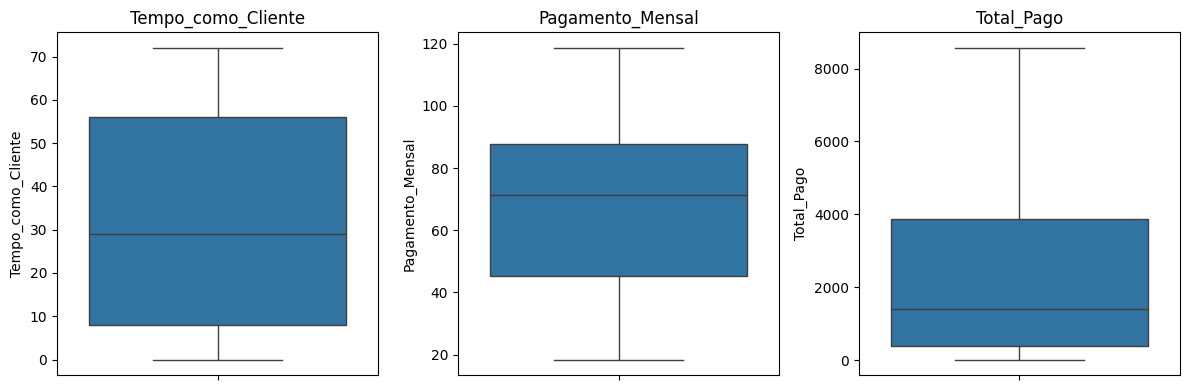

In [78]:
# Checagem visual dos outliers
plt.figure(figsize=(12, 4))
for i, col in enumerate(col_numericas):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


A utilização do IQR e os bloxplots não apresentam a existência de outliers dentro das colunas numéricas do dataframe. Dado a estes fatores isso, tratamento de outliers não é necessário neste momento.

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

### Observando a influência da coluna Tempo como cliente x Total Pago e as duas variáveis em relação a Churn.

In [79]:
# Analise bivariada entre "Tempo_como_Cliente" e "Total_Pago"
# Coorrelação
df[['Tempo_como_Cliente', 'Total_Pago']].corr().round(2)

,Tempo_como_Cliente,Total_Pago
Tempo_como_Cliente,1.00,0.83
Total_Pago,0.83,1.00


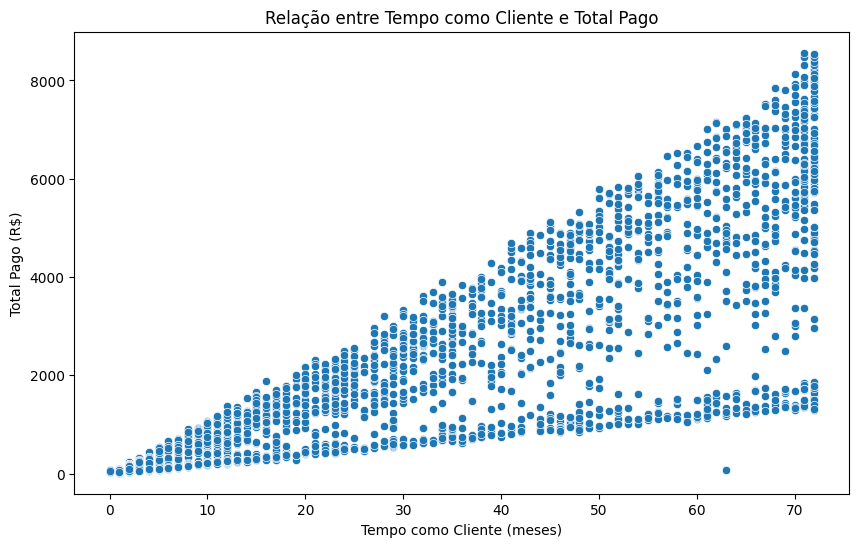

In [80]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tempo_como_Cliente', y='Total_Pago')
plt.title('Relação entre Tempo como Cliente e Total Pago') 
plt.xlabel('Tempo como Cliente (meses)')
plt.ylabel('Total Pago (R$)')
plt.show()

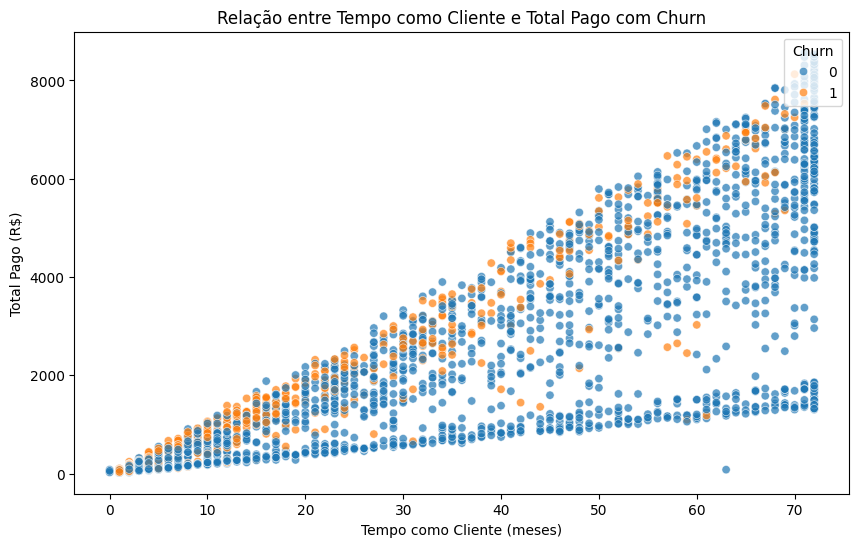

In [81]:
# Checando a possível relação entre as duas variáveis e o churn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tempo_como_Cliente', y='Total_Pago', hue='Churn', alpha=0.7)
plt.title('Relação entre Tempo como Cliente e Total Pago com Churn')
plt.xlabel('Tempo como Cliente (meses)')
plt.ylabel('Total Pago (R$)')
plt.legend(title='Churn', loc='upper right')
plt.show()

Ao analisar a distribuição e correlação das variáveis, é evidente que "Tempo_como_Cliente" influencia diretamente "Total_Pago", o que já havia sido apontado na análise univariada. No entanto, quando observadas em conjunto, essas variáveis não demonstram uma influência significativa sobre o churn de forma direta. Ainda assim, analisar cada uma dessas variáveis isoladamente em relação ao churn pode revelar padrões e insights relevantes, especialmente sobre o comportamento de clientes com menor tempo de permanência ou menor valor total pago.

In [82]:
# Checando a correlação entre "Tempo_como_Cliente", "Total_Pago" e "Churn"
df[['Tempo_como_Cliente', 'Total_Pago','Churn']].corr().round(2)

,Tempo_como_Cliente,Total_Pago,Churn
Tempo_como_Cliente,1.00,0.83,-0.35
Total_Pago,0.83,1.00,-0.19
Churn,-0.35,-0.19,1.00


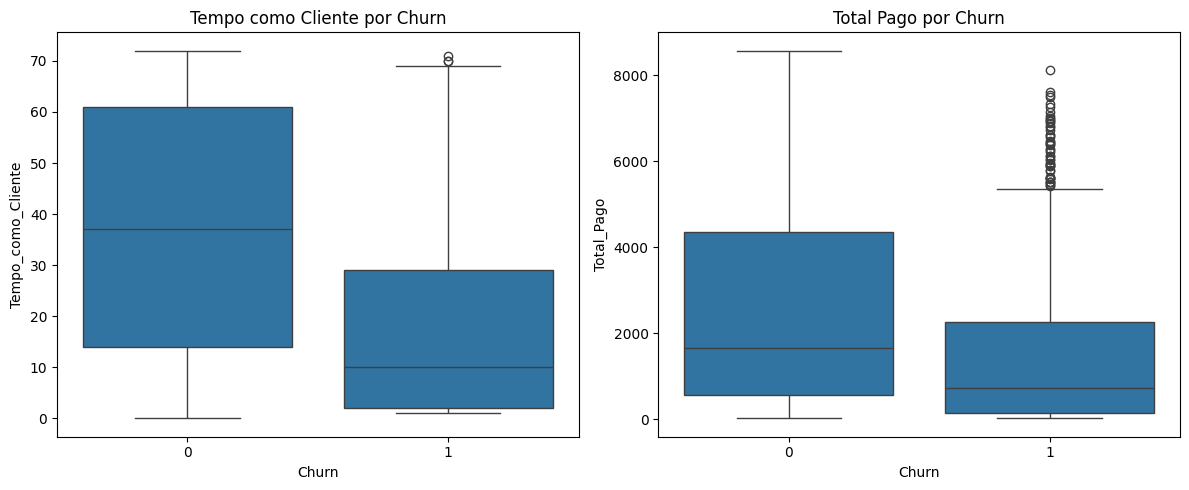

In [83]:
#Verificando a relação de "Churn" com "Tempo_como_Cliente" e "Total_Pago" individualmente
plt.figure(figsize=(12, 5)) 
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='Tempo_como_Cliente')
plt.title('Tempo como Cliente por Churn')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='Total_Pago')
plt.title('Total Pago por Churn')
plt.tight_layout()
plt.show()

Após a análise de correlação e a visualização por meio de boxplots, observa-se que a variável "Tempo_como_Cliente" apresenta uma relação moderada com o churn. Clientes com maior tempo de permanência na assinatura tendem a ter menores taxas de cancelamento, enquanto aqueles com menos tempo de vínculo — especialmente entre 0 e 30 meses — mostram-se mais propensos ao churn.

Quanto à variável "Total_Pago", a relação com o churn parece ser mais indireta, sendo influenciada principalmente pelo tempo como cliente. O padrão observado sugere que clientes que não realizaram o churn pagaram, em média, valores significativamente maiores, o que é esperado, dado o maior tempo de permanência no serviço.

### Observando a relação entre Tipo Contrato x Churn

In [84]:
# Grafico de barras empilhadas para comparar "Churn" com "Tipo_Contrato"
fig_tipo_contrato_churn = px.histogram(df, x='Tipo_Contrato', color='Churn', barmode='group',
                                        title='Distribuição de Churn por Tipo de Contrato',
                                        labels={'Tipo_Contrato': 'Tipo de Contrato', 'Churn': 'Churn'})

fig_tipo_contrato_churn.update_layout(bargap=0.1)
fig_tipo_contrato_churn.show()


Confirmando a hipótese levantada na análise univariada, observa-se que a maioria dos clientes que cancelam o serviço estão vinculados ao contrato do tipo "Month-to-month". Isso pode ser explicado pela necessidade de renovação mensal, que reforça constantemente a decisão de permanecer ou não no serviço. Essa frequente lembrança do pagamento e ausência de compromisso de longo prazo podem levar o cliente à desistência, resultando em churn.

Diante desse cenário, é recomendável considerar ações estratégicas voltadas à retenção desses clientes, como descontos progressivos, benefícios exclusivos ou programas de fidelidade para contratos de longo prazo. Essas medidas podem contribuir significativamente para a redução da taxa de churn e o aumento da base de clientes com maior tempo de permanência no serviço.

### Analisando Pagamento Mensal x Tempo como cliente x Churn

In [85]:
# Avalioando a relação entre Pagamento_Mensal e Tempo como cliente
df[['Tempo_como_Cliente', 'Pagamento_Mensal']].corr()


,Tempo_como_Cliente,Pagamento_Mensal
Tempo_como_Cliente,1.000000,0.217169
Pagamento_Mensal,0.217169,1.000000


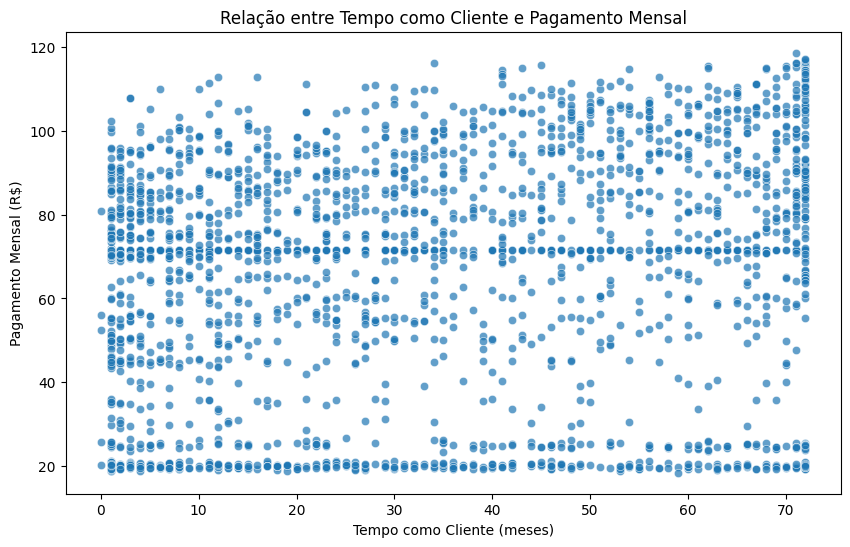

In [86]:
# Observando a dispersão entre "Pagamento_Mensal" e "Tempo_como_Cliente"
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Tempo_como_Cliente', y='Pagamento_Mensal', alpha=0.7)
plt.title('Relação entre Tempo como Cliente e Pagamento Mensal')
plt.xlabel('Tempo como Cliente (meses)')
plt.ylabel('Pagamento Mensal (R$)')
plt.show()

Apesar da hipótese inicial de que clientes com mais tempo de permanência tenderiam a migrar para planos mais caros, a análise não demonstrou uma correlação significativa entre as variáveis "Tempo_como_Cliente" e "Pagamento_Mensal". Além disso, o gráfico de dispersão não evidenciou qualquer tendência clara, indicando que o tempo de vínculo com a empresa não é um bom preditor do valor mensal pago.

Esse resultado sugere que o valor do pagamento mensal está mais relacionado ao perfil e à necessidade individual de cada cliente — como o tipo de serviço desejado ou sua disponibilidade financeira — do que ao tempo de permanência. Portanto, estratégias de migração para planos mais completos devem considerar segmentações por perfil de consumo e comportamento, e não apenas a antiguidade do cliente.

#### Pagamento mensal x Churn

In [87]:
# Observando pagamento mensal com churn

fig_pagamento_mensal_churn = px.histogram(df, x='Pagamento_Mensal', color='Churn', barmode='group',
                                        title='Distribuição de Churn por Pagamento_Mensal',
                                        labels={'Pagamento_Mensal': 'Pagamento Mensal', 'Churn': 'Churn'})

fig_pagamento_mensal_churn.show()


É observável que valores mais altos de pagamento mensal resultam em um número maior de Churn. Aprofundamento na análise é necessária para que a causa seja descoberta, mas uma possível explicação é que os clientes não se sentem satisfeitos com o que o produto entrega levando seu preço em consideração. É recomendável uma pesquisa de mercado de serviços competidores semelhantes para assim podermos superar a entrega do produto, transformando a visão do cliente, sentindo que está pagando por um produto que vale seu preço

### Avaliando a relação entre Tipo de Pagamento x Churn x Idoso

In [88]:
# Grafico de barras empilhadas para comparar "Churn" com "Tipo_Pagamento"
fig_tipo_pagamento_churn = px.histogram(df, x='Tipo_Pagamento', color='Churn', barmode='group',
                                        title='Distribuição de Churn por Tipo de Pagamento',
                                        labels={'Tipo_Contrato': 'Tipo de Pagamento', 'Churn': 'Churn'})

fig_tipo_pagamento_churn.update_layout(bargap=0.1)
fig_tipo_pagamento_churn.show()


A análise da variável "Tipo_Pagamento" mostra que formas de pagamento mais práticas e automatizadas — como cartão de crédito automático e transferência bancária automática — estão associadas a menores taxas de churn, enquanto métodos como cheque eletrônico apresentam taxas significativamente mais altas. Essa diferença pode ser explicada pela maior conveniência dos meios automáticos, que reduzem a necessidade de ações recorrentes por parte do cliente.

Diante disso, recomenda-se a adoção de estratégias de retenção que incentivem a migração para métodos de pagamento automáticos, como descontos exclusivos ou benefícios adicionais. Tais ações podem aumentar a fidelização ao serviço ao minimizar os atritos no processo de pagamento e diminuir a probabilidade de cancelamento.

Além disso, é interessante analisar a variável "Idoso", já que clientes mais velhos podem preferir formas de pagamento mais tradicionais, como cheques. Isso pode influenciar diretamente nas taxas de churn desse grupo. Entender essa relação pode ajudar a criar estratégias de retenção mais eficazes para diferentes faixas etárias, como oferecer incentivos para que clientes mais velhos adotem formas de pagamento automático, que são mais práticas e reduzem o risco de cancelamento.

In [89]:
# Observando o tipo de pagamento no grupo dos idosos
fig_tipo_pagamento_idoso = px.histogram(df, x='Tipo_Pagamento', color='Idoso', barmode='group',
                                        title='Distribuição de idosos por Tipo de Pagamento',
                                        labels={'Tipo_Contrato': 'Tipo de Pagamento'})

fig_tipo_pagamento_idoso.update_layout(bargap=0.1)
fig_tipo_pagamento_idoso.show()

A análise mostra que clientes que usam formas de pagamento automáticas, como cartão de crédito e transferência bancária, tendem a cancelar menos o serviço. Já o cheque eletrônico, mesmo sendo o mais usado, tem a maior taxa de churn, o que pode indicar que ele é o padrão oferecido ou mais acessível, e não necessariamente a escolha preferida.

Tanto idosos quanto não idosos seguem esse padrão, o que mostra que a praticidade do pagamento influencia mais do que a idade. Por isso, oferecer vantagens para quem escolhe pagamentos automáticos pode ser uma boa estratégia para manter mais clientes por mais tempo.

### Analisando Casado x Churn


In [90]:
df[['Casado','Churn']].corr()

,Casado,Churn
Casado,1.000000,-0.146286
Churn,-0.146286,1.000000


In [91]:

# Taxa de Churn por estado civil
churn_casados = df.groupby('Casado')['Churn'].agg(
    Total_Clientes='count',
    Total_Churn='sum',
    Taxa_Churn=lambda x: (x.sum() / x.count()) * 100
).reset_index() 

# Criar o gráfico de barras
fig_estado_civil_churn = px.bar(churn_casados, x='Casado', y='Taxa_Churn', title='Taxa de Churn por Estado Civil',
    labels={'casado': 'Estado Civil (0 = Solteiro, 1 = Casado)', 'Taxa_Churn': 'Taxa de Churn (%)'}
)
fig_estado_civil_churn.update_layout(bargap=0.1,)

fig_estado_civil_churn.show()

A análise dos dados mostra que clientes solteiros têm uma taxa de Churn de 32%, enquanto entre os casados esse número cai para 19%. Essa diferença de 13 pontos percentuais indica que o estado civil influencia diretamente na decisão de cancelamento. Para reduzir o Churn entre solteiros, seria eficaz oferecer planos mais flexíveis e descontos por indicação. Entre os casados, a estratégia deve focar em reforçar o valor dos serviços, como benefícios familiares ou programas de fidelidade.

### Relação entre Tempo como Cliente x Tipo de Contrato x Churn

In [92]:
# Agrupar dados por Tipo_Contrato e calcular métricas de Churn
analise_contrato = df.groupby('Tipo_Contrato').agg(
    Total_Clientes=('Churn', 'count'),
    Total_Churn=('Churn', 'sum'),
    Taxa_Churn=('Churn', lambda x: (x.sum() / len(x)) * 100),
    Tempo_Medio=('Tempo_como_Cliente', 'mean')).reset_index()

fig_tempo_contrato_churn = px.bar(analise_contrato, x='Tipo_Contrato', y=['Taxa_Churn', 'Tempo_Medio'], barmode='group', 
                                    title='Relação entre Tipo de Contrato, Tempo como Cliente e Churn',
                                    labels={'value': 'Valor', 'variable': 'Métrica'})

fig_tempo_contrato_churn.update_layout(yaxis_title="Taxa de Churn (%) / Tempo Médio (Meses)",
                                        xaxis_title="Tipo de Contrato")

fig_tempo_contrato_churn.show()

O gráfico mostra claramente que o tipo de contrato tem forte relação com o tempo de permanência e taxa de cancelamento. Clientes com contratos mensais apresentam a maior taxa de Churn e menor tempo médio como cliente, indicando alta rotatividade. Já os contratos anuais têm desempenho intermediário, enquanto os bienais mostram os melhores resultados - menor Churn e maior tempo de permanência. Isso revela que compromissos de longo prazo geram maior fidelização. A estratégia ideal seria incentivar a migração dos clientes mensais para planos anuais ou bienais, oferecendo benefícios como descontos progressivos ou vantagens exclusivas na renovação, aproveitando assim a tendência natural de maior retenção nos contratos de prazo mais extenso.

### Analisando a relação dos Serviços x Churn

In [93]:
# Taxa de Churn por serviço individual
for servico in ['Servico_Internet', 'Servico_seguranca', 'Suporte_Tecnico', 'Streaming_TV']:

    print('\n',df.groupby(servico)['Churn'].mean().sort_values(ascending=False)*100)


 Servico_Internet
Fiber optic    42.001787
DSL            17.365269
No              6.072106
dsl             0.000000
Name: Churn, dtype: float64

 Servico_seguranca
No                     41.068581
Yes                    14.144272
No internet service     6.072106
Name: Churn, dtype: float64

 Suporte_Tecnico
No                     42.000000
Yes                    12.658228
No internet service     6.072106
Name: Churn, dtype: float64

 Streaming_TV
No                     33.066933
Yes                    29.583333
No internet service     6.072106
Name: Churn, dtype: float64


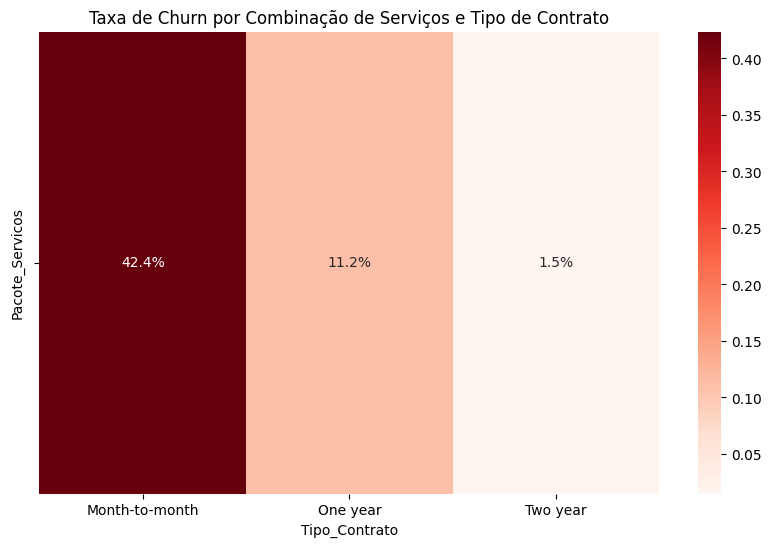

In [95]:
# Criar combinações de serviços
df['Pacote_Servicos'] = df[['Servico_Internet', 'Servico_seguranca', 'Suporte_Tecnico', 'Streaming_TV']].apply(
    lambda x: '+'.join(x[x == 'Sim']), axis=1)

# Heatmap de serviços vs variável complementar
plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(df['Pacote_Servicos'], 
                       df['Tipo_Contrato'], 
                       values=df['Churn'], 
                       aggfunc='mean'),
            annot=True,
            fmt='.1%',
            cmap='Reds')
plt.title('Taxa de Churn por Combinação de Serviços e Tipo de Contrato')
plt.show()

##### Fibra óptica tem o maior Churn (42%), possivelmente por custo alto ou expectativas não atendidas. 
- ##### Ação: Revisar preços e qualidade do serviço.

##### Serviços adicionais (segurança e suporte) reduzem Churn em ~30 p.p., mostrando que agregam valor.
- ##### Ação: Criar pacotes promocionais com esses serviços.

##### Contratos longos + serviços combinados têm Churn mínimo (<10%).
- ##### Ação: Incentivar migração para planos anuais/bienais com serviços inclusos.

##### Causa principal: Clientes com serviços básicos (só internet) ou contratos curtos cancelam mais por perceberem pouco valor.
##### Solução-chave: Oferecer upgrades para pacotes completos com descontos.

### Variáveis com maior impacto em Churn

#### As análises bivariadas e univariadas revelaram os principais fatores que influenciam o Churn:

#### Tipo de contrato e tempo como cliente
 - ##### Clientes com contratos mensais, principalmente nos primeiros 20-30 meses, apresentam maior tendência ao cancelamento. A estratégia mais eficaz seria incentivar a migração para planos anuais ou bienais, reduzindo significativamente a taxa de Churn nesse grupo.

#### Valor mensal pago
- ##### Mensalidades mais altas estão diretamente relacionadas a taxas de Churn elevadas. Isso sugere que os clientes podem não perceber valor equivalente ao custo dos planos premium. Recomenda-se uma pesquisa de mercado para realinhar os benefícios dos planos, garantindo que superem as ofertas dos concorrentes em termos de custo-benefício.

#### Forma de pagamento
- ##### Métodos não automáticos, como cheque eletrônico, resultam em mais cancelamentos, especialmente quando combinados com contratos mensais. A necessidade de pagamento manual parece ser um fator decisivo. Campanhas que incentivem o uso de pagamentos automáticos (com benefícios exclusivos) podem reduzir o Churn nesse segmento.

#### Estado civil
- ##### Solteiros demonstram maior propensão ao cancelamento em comparação com casados. Para reter esse público, estratégias como planos familiares (com vantagens compartilhadas) ou programas de indicação (com recompensas) podem ser mais eficazes.

#### Serviços Utilizados
- ##### Clientes com fibra óptica estão cancelando mais, possivelmente por custo alto ou expectativas não atendidas. Já quem assina serviços extras, como segurança e suporte, tende a continuar, mostrando que esses adicionais aumentam a percepção de valor. Quando esses serviços vêm combinados com contratos mais longos, o cancelamento é ainda menor. O principal problema está nos clientes com planos básicos e contratos curtos, que percebem pouco benefício e acabam cancelando. A solução é clara: incentivar upgrades para pacotes completos e duradouros, oferecendo boas condições e descontos.

#### Essas descobertas destacam oportunidades claras para melhorar a retenção de clientes, com ações direcionadas a cada variável-chave.